In [1]:
import pandas as pd
import numpy as np

In [3]:
import warnings

warnings.filterwarnings("ignore", message="Parameters: { \"silent\" } are not used.")


In [4]:

# Read CSV into pandas
df = pd.read_csv("../data/students_achievement_1.csv", index_col=[0])
df.head()

,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,Year-DOB,Month-DOB
0,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9,2007,9
1,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5,2007,11
2,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2,2007,7
3,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9,2007,2
4,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2,2007,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24190 entries, 0 to 24189
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PROV_NM         24190 non-null  object 
 1   SUBM            24190 non-null  object 
 2   Teacher_Gender  24190 non-null  object 
 3   ACHIEVEMENTS1   24172 non-null  float64
 4   ACHIEVEMENTS2   24190 non-null  float64
 5   MIDTERM1        24172 non-null  float64
 6   MIDTERM2        24190 non-null  float64
 7   FINAL1          24174 non-null  float64
 8   FINAL2          24190 non-null  float64
 9   TOTAL1          24174 non-null  float64
 10  TOTAL2          24190 non-null  int64  
 11  D_MARK          24190 non-null  int64  
 12  NAT_MARK        24190 non-null  float64
 13  GPA             24190 non-null  float64
 14  Year-DOB        24190 non-null  int64  
 15  Month-DOB       24190 non-null  int64  
dtypes: float64(9), int64(4), object(3)
memory usage: 3.1+ MB


In [6]:
# # Extract year and month using regex
# df['Year-DOB'] = df['CPR_NO'].astype(str).str.extract(r'^(\d{1})').astype(int) + 2000
# df['Month-DOB'] = df['CPR_NO'].astype(str).str.extract(r'^\d{1}(\d{2})').astype(int)

In [7]:
df.head()

,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,Year-DOB,Month-DOB
0,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9,2007,9
1,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5,2007,11
2,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2,2007,7
3,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9,2007,2
4,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2,2007,5


In [8]:
df.drop(['TOTAL1','ACHIEVEMENTS2','MIDTERM2', 'FINAL2', 'TOTAL2', 'D_MARK', "GPA"], axis=1, inplace=True)


In [9]:
df.keys()

Index(['PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1', 'MIDTERM1',
       'FINAL1', 'NAT_MARK', 'Year-DOB', 'Month-DOB'],
      dtype='object')

In [10]:
df[df.isna().any(axis=1)].sample(4)

,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1,NAT_MARK,Year-DOB,Month-DOB
9283,Cap,Science,F,NaN,NaN,NaN,46.1,2007,9
20339,Muharaq,Math,F,NaN,NaN,NaN,59.3,2007,10
18375,South,Math,F,NaN,NaN,NaN,46.3,2007,1
4168,South,Science,F,NaN,NaN,NaN,41.1,2006,8


In [11]:
df.shape

(24190, 9)

In [12]:
df.isna().sum() #/df.shape[0]*100

PROV_NM            0
SUBM               0
Teacher_Gender     0
ACHIEVEMENTS1     18
MIDTERM1          18
FINAL1            16
NAT_MARK           0
Year-DOB           0
Month-DOB          0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
for col in ['SUBM', "PROV_NM","Teacher_Gender" ]:
    print(f" {col} : { df[col].unique()}")

 SUBM : ['Science' 'Math']
 PROV_NM : ['Cap' 'North' 'South' 'Muharaq']
 Teacher_Gender : ['M' 'F']


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in ['SUBM', "PROV_NM"]:

    df[col] = label_encoder.fit_transform(df[col])
    for i, cls in enumerate(label_encoder.classes_):
        print(f"  {cls} -> {i}")

  Math -> 0
  Science -> 1
  Cap -> 0
  Muharaq -> 1
  North -> 2
  South -> 3


In [16]:
df.Teacher_Gender=((df.Teacher_Gender=="M")+0)

In [17]:
df.sample(5)

,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1,NAT_MARK,Year-DOB,Month-DOB
8922,0,1,1,30.0,20.0,45.0,58.3,2007,12
13550,3,0,1,29.0,14.0,22.0,39.9,2007,3
292,2,1,1,27.0,19.0,42.0,43.2,2007,3
3688,2,1,0,28.5,16.0,43.5,55.3,2008,1
16726,3,0,1,26.0,18.0,24.0,48.5,2007,8


In [18]:
df.NAT_MARK.describe()

count    24172.000000
mean        51.171649
std         10.742820
min          0.000000
25%         44.200000
50%         51.300000
75%         58.300000
max         90.000000
Name: NAT_MARK, dtype: float64

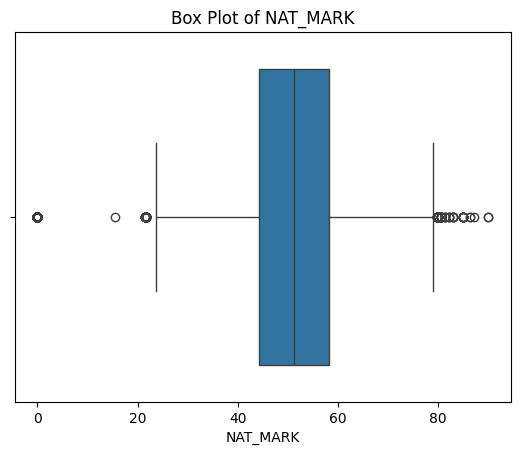

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df["NAT_MARK"])
plt.title("Box Plot of NAT_MARK")
plt.show()

In [20]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df["NAT_MARK"]))
df[(z_scores > 3)] # Outliers 


,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1,NAT_MARK,Year-DOB,Month-DOB
303,2,1,1,27.0,14.0,19.0,0.0,2007,10
315,2,1,1,30.0,19.0,44.0,0.0,2007,10
331,2,1,1,0.0,0.0,51.0,0.0,2009,50
350,2,1,1,27.0,6.0,8.0,0.0,2006,9
614,2,1,1,23.0,3.0,7.0,15.5,2007,8
...,...,...,...,...,...,...,...,...,...
23796,3,0,1,12.0,0.0,3.0,0.0,2006,4
23894,1,0,0,30.0,20.0,50.0,90.0,2007,2
23908,1,0,0,30.0,20.0,50.0,85.0,2008,2
23909,1,0,0,30.0,20.0,50.0,85.0,2007,12


In [21]:
bins = [0, 60, 70, 80, 90, 100]
names = ['0-60', '60-70', '70-80', '80-90', '90-100']

df['NAT_MARK_range'] = pd.cut(df['NAT_MARK'], bins, labels=names)

In [22]:
df["NAT_MARK_range"].value_counts()

NAT_MARK_range
0-60      19242
60-70      4023
70-80       692
80-90        33
90-100        0
Name: count, dtype: int64

In [23]:
df.isna().sum()

PROV_NM             0
SUBM                0
Teacher_Gender      0
ACHIEVEMENTS1       0
MIDTERM1            0
FINAL1              0
NAT_MARK            0
Year-DOB            0
Month-DOB           0
NAT_MARK_range    182
dtype: int64

In [24]:
df.shape

(24172, 10)

In [25]:
df["NAT_MARK_range"][df.isna().any(axis=1)]

303      NaN
315      NaN
331      NaN
350      NaN
955      NaN
        ... 
23507    NaN
23525    NaN
23634    NaN
23677    NaN
23796    NaN
Name: NAT_MARK_range, Length: 182, dtype: category
Categories (5, object): ['0-60' < '60-70' < '70-80' < '80-90' < '90-100']

In [26]:
df.isna().sum()/df.shape[0]

PROV_NM           0.000000
SUBM              0.000000
Teacher_Gender    0.000000
ACHIEVEMENTS1     0.000000
MIDTERM1          0.000000
FINAL1            0.000000
NAT_MARK          0.000000
Year-DOB          0.000000
Month-DOB         0.000000
NAT_MARK_range    0.007529
dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24172 entries, 0 to 24189
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PROV_NM         24172 non-null  int64   
 1   SUBM            24172 non-null  int64   
 2   Teacher_Gender  24172 non-null  int64   
 3   ACHIEVEMENTS1   24172 non-null  float64 
 4   MIDTERM1        24172 non-null  float64 
 5   FINAL1          24172 non-null  float64 
 6   NAT_MARK        24172 non-null  float64 
 7   Year-DOB        24172 non-null  int64   
 8   Month-DOB       24172 non-null  int64   
 9   NAT_MARK_range  23990 non-null  category
dtypes: category(1), float64(4), int64(5)
memory usage: 1.9 MB


In [28]:
df["NAT_MARK_range"].mode()[0]

'0-60'

In [29]:

df["NAT_MARK_range"] = df["NAT_MARK_range"].fillna(df["NAT_MARK_range"].mode()[0])
df["NAT_MARK_range_encoded"] = LabelEncoder().fit_transform(df["NAT_MARK_range"])

In [30]:
df.isna().sum()

PROV_NM                   0
SUBM                      0
Teacher_Gender            0
ACHIEVEMENTS1             0
MIDTERM1                  0
FINAL1                    0
NAT_MARK                  0
Year-DOB                  0
Month-DOB                 0
NAT_MARK_range            0
NAT_MARK_range_encoded    0
dtype: int64

In [31]:
df.sample(5, random_state=15)

,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1,NAT_MARK,Year-DOB,Month-DOB,NAT_MARK_range,NAT_MARK_range_encoded
7640,0,1,0,30.0,20.0,47.0,71.4,2008,1,70-80,2
22627,2,0,0,29.5,18.0,39.0,54.1,2007,12,0-60,0
8374,2,1,0,30.0,20.0,49.5,69.9,2007,8,60-70,1
8474,2,1,0,30.0,19.0,49.5,59.0,2007,9,0-60,0
18051,0,0,1,29.4,18.2,32.5,63.6,2007,1,60-70,1


In [32]:
df.to_csv("../data/inference_regression_1.csv" , index=False)

In [33]:
df.drop(['NAT_MARK_range', "NAT_MARK_range_encoded"], axis=1)

,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1,NAT_MARK,Year-DOB,Month-DOB
0,0,1,1,28.0,17.0,45.0,53.7,2007,9
1,0,1,1,27.0,14.0,41.5,49.7,2007,11
2,0,1,1,27.0,13.0,27.5,52.1,2007,7
3,0,1,1,26.0,15.0,44.0,52.9,2007,2
4,0,1,1,25.0,14.0,31.5,52.1,2007,5
...,...,...,...,...,...,...,...,...,...
24185,3,0,1,30.0,20.0,47.0,61.9,2007,3
24186,3,0,1,30.0,17.0,17.0,44.5,2007,10
24187,3,0,1,26.0,12.0,24.0,44.5,2007,4
24188,3,0,1,28.0,18.0,37.0,46.3,2007,8


In [34]:
y=df["NAT_MARK_range_encoded"]
X=df.drop(['NAT_MARK_range', "NAT_MARK_range_encoded"], axis=1)

In [35]:
y.unique()

array([0, 3, 2, 1])

In [36]:
df.select_dtypes(include="category").columns

Index(['NAT_MARK_range'], dtype='object')

In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor

column_trans=make_column_transformer(
(StandardScaler(), ['ACHIEVEMENTS1', 'MIDTERM1' , 'FINAL1']),
(OneHotEncoder(), ['PROV_NM']),
   #PCA(n_components=.95, svd_solver="full"),
 remainder="passthrough")

In [38]:
! python3 -m pip install --upgrade pip
! pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 40.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [39]:
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
pipe=make_pipeline( column_trans,
                   #SVC()
XGBClassifier( objective="multi:softmax", seed=42, nthread=-1) )

In [40]:
np.arange(1,100, 20)

array([ 1, 21, 41, 61, 81])

In [41]:
from scipy import stats as st

param_1={
    "svc__C":stats.expon(scale=100),
    "svc__gamma":stats.expon(scale=.1),
    "svc__class_weight":["balanced", "None"]


 }
# A parameter grid for XGBoost
param_2 = {
    'xgbclassifier__n_estimators': st.randint(100, 1000),
    'xgbclassifier__learning_rate': st.uniform(0.01, 0.6),
    'xgbclassifier__colsample_bytree': st.uniform(0.01, 0.9),
    'xgbclassifier__max_depth': np.arange(3, 8)

        }

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y , test_size=0.3,random_state=42,stratify = y, shuffle=True)
X_valid,X_test,y_valid, y_test=train_test_split(X_test,y_test , test_size=0.5,random_state=123)

In [43]:
y_test.unique() , y_train.unique()

(array([1, 0, 2, 3]), array([1, 0, 2, 3]))

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split

skf = StratifiedKFold(n_splits=5 ,shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(pipe, param_distributions=param_2, scoring='f1_macro', n_jobs=-1,
                                   cv=skf.split(X_train,y_train), verbose=3, random_state=42 )


random_search.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 2/10] END xgbclassifier__colsample_bytree=0.34708610696262626, xgbclassifier__learning_rate=0.5804285838459496, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=171;, score=1.000 total time=   1.9s
[CV 1/10] END xgbclassifier__colsample_bytree=0.34708610696262626, xgbclassifier__learning_rate=0.5804285838459496, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=171;, score=1.000 total time=   2.2s
[CV 3/10] END xgbclassifier__colsample_bytree=0.34708610696262626, xgbclassifier__learning_rate=0.5804285838459496, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=171;, score=1.000 total time=   1.2s
[CV 4/10] END xgbclassifier__colsample_bytree=0.34708610696262626, xgbclassifier__learning_rate=0.5804285838459496, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=171;, score=1.000 total time=   1.5s
[CV 5/10] END xgbclassifier__colsample_bytree=0.34708610696262626, xgbclassifier__learning_rate=0.580

/home/codespace/.local/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x72556e6c5be0>,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['ACHIEVEMENTS1',
                                                                                'MIDTERM1',
                                                                                'FINAL1']),
                                                                              ('onehotencoder',
                                                                               OneHotEncoder(),
                                                                               ['PROV_NM'])])),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=None,
                                                            boost...
                   param_distributions={'xgbclassifier__colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x72556e7048c0>,
                                        'xgbclassifier__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x72556e7048f0>,
                                        'xgbclassifier__max_depth': array([3, 4, 5, 6, 7]),
                                        'xgbclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x72556e704950>},
                   random_state=42, scoring='f1_macro', verbose=3)

In [46]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (3, 5))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)
results.head()


 All results:
{'mean_fit_time': array([1.33927519, 1.5311187 , 4.21610074, 2.33132668, 1.70704646,
       3.38348634, 2.51592569, 4.38083303, 2.38796337, 2.30366652]), 'std_fit_time': array([0.46023874, 0.08089783, 0.26559373, 0.09150934, 0.09719037,
       0.17358958, 0.0533205 , 0.20439925, 0.12661909, 0.28343503]), 'mean_score_time': array([0.0276602 , 0.02837913, 0.04218998, 0.04049163, 0.02409267,
       0.03604269, 0.03413029, 0.03684528, 0.02906649, 0.0347249 ]), 'std_score_time': array([0.01222414, 0.00748932, 0.00827685, 0.01363429, 0.00624238,
       0.01329111, 0.00673221, 0.00452812, 0.00525591, 0.01563907]), 'param_xgbclassifier__colsample_bytree': masked_array(data=[0.34708610696262626, 0.548792635777333,
                   0.06227525095137952, 0.647265320016441,
                   0.7591983767203796, 0.5657333586649449,
                   0.030756182537274183, 0.8863799669573132,
                   0.47281099457225045, 0.5567903667112946],
             mask=[False, Fals

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__colsample_bytree,param_xgbclassifier__learning_rate,param_xgbclassifier__max_depth,param_xgbclassifier__n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.339275,0.460239,0.027660,0.012224,0.347086,0.580429,5,171,{'xgbclassifier__colsample_bytree': 0.34708610...,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,1.531119,0.080898,0.028379,0.007489,0.548793,0.103611,5,314,{'xgbclassifier__colsample_bytree': 0.54879263...,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,4.216101,0.265594,0.042190,0.008277,0.062275,0.529706,6,971,{'xgbclassifier__colsample_bytree': 0.06227525...,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,2.331327,0.091509,0.040492,0.013634,0.647265,0.022351,4,443,{'xgbclassifier__colsample_bytree': 0.64726532...,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,1.707046,0.097190,0.024093,0.006242,0.759198,0.137403,6,376,{'xgbclassifier__colsample_bytree': 0.75919837...,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [47]:
y_train.head()

20754    1
3049     0
929      0
13272    0
6371     0
Name: NAT_MARK_range_encoded, dtype: int64

In [48]:
X_train.shape

(16920, 9)

In [50]:
from sklearn.model_selection import learning_curve

train_size, train_score, test_score =learning_curve(estimator=pipe,
                                                    X=X_train,
                                                    y=y_train,
                                                    train_sizes=np.linspace(0.1, 1, 10 ), scoring='f1_weighted',

                                                    cv=10 , n_jobs=1)

In [51]:
train_mean=np.mean(train_score, axis=1)
train_std= np.std (train_score, axis=1)
test_mean= np.mean(test_score,  axis=1)
test_std=  np.std (test_score,  axis=1)

In [52]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [62]:
def plotGraph(x, y1, y2, y1std, y2std, scl, lbl):
    plt.plot(x,
             y1,
                     color="blue", marker="o", markersize=5, label="Training Accuracy")
    plt.fill_between(
        x,
        y1 +y1std,
        y1-y1std,
                        color="blue", alpha=0.15)

    plt.plot(x,
             y2,
                     color="green", marker="s",linestyle="--", markersize=5, label="Validation Accuracy")
    plt.fill_between(
                    x,
                    y2 +y2std,
                    y2-y2std,
                        color="green", alpha=0.15)

    plt.grid()
    plt.xlabel(lbl) #" Number of Training Example")
    plt.xscale(scl)
    plt.ylabel("Accuracy ")
    plt.legend(loc="lower right")
    plt.ylim([0.99, 1.01])
    plt.show()

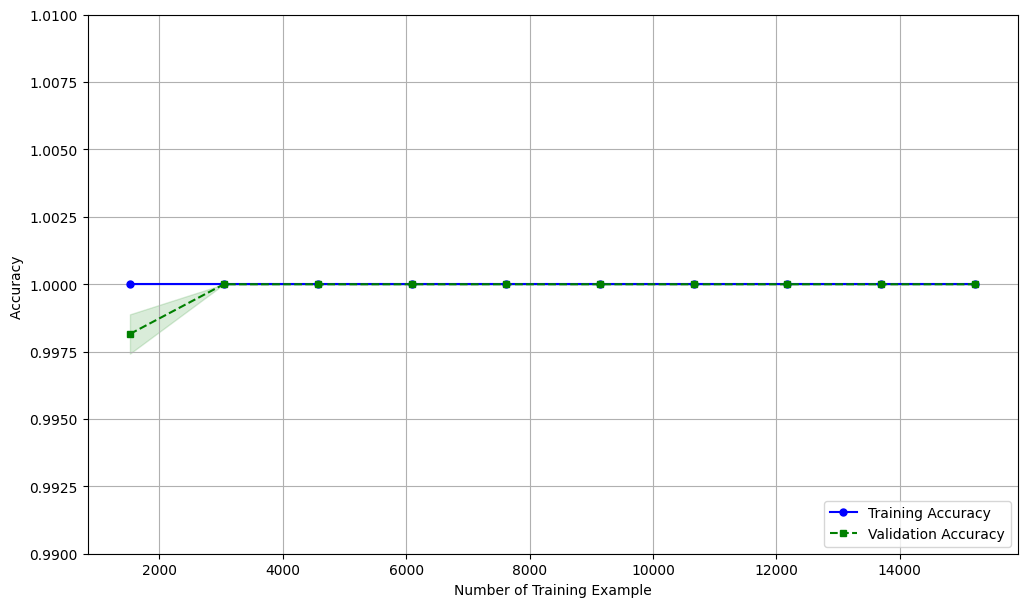

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plotGraph(train_size, train_mean, test_mean,
          train_std, test_std,"linear", "Number of Training Example")

In [71]:
random_search.best_params_

{'xgbclassifier__colsample_bytree': np.float64(0.34708610696262626),
 'xgbclassifier__learning_rate': np.float64(0.5804285838459496),
 'xgbclassifier__max_depth': np.int64(5),
 'xgbclassifier__n_estimators': 171}

__  Assuming pipe and random_search are already defined and run
+ pipe.set_params(**random_search.best_params_)   -  _Set the best parameters_
+ pipe.fit(X_train, y_train)                      -  _Train on full training data_
+ y_pred = pipe.predict(X_test)                   -  _Predict on test data_

__ Evaluate
- from sklearn.metrics import f1_score
- f1 = f1_score(y_test, y_pred, average='macro')
- print(f"F1 Macro Score on Test Set: {f1}")

__ Or use best_estimator_ directly
_ best_pipe = random_search.best_estimator_
_ y_pred = best_pipe.predict(X_test)
_ f1 = f1_score(y_test, y_pred, average='macro')
_ print(f"F1 Macro Score with best_estimator_: {f1}")

In [72]:
pipe.set_params(**random_search.best_params_)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['ACHIEVEMENTS1', 'MIDTERM1',
                                                   'FINAL1']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['PROV_NM'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytr...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.5804285838459496),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=np.int64(5), max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=171, n_jobs=None, nthread=-1, ...))])

In [73]:
pipe.fit(X_train, y_train)  #  reuse the pipe

/home/codespace/.local/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['ACHIEVEMENTS1', 'MIDTERM1',
                                                   'FINAL1']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['PROV_NM'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytr...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.5804285838459496),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=np.int64(5), max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=171, n_jobs=None, nthread=-1, ...))])

In [74]:
# evaluatte the model 
y_pred = pipe.predict(X_valid)  

In [75]:
pipe.set_params(**random_search.best_params_)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['ACHIEVEMENTS1', 'MIDTERM1',
                                                   'FINAL1']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['PROV_NM'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytr...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.5804285838459496),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=np.int64(5), max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=171, n_jobs=None, nthread=-1, ...))])

#### use Early Stoping criteria 

In [76]:
clf=random_search.best_estimator_

In [70]:
xg_classifier=XGBClassifier(xgbclassifier__colsample_bytree=  0.34708610696262626,
 xgbclassifier__learning_rate= 0.5804285838459496,
 xgbclassifier__max_depth = 5,
 xgbclassifier__n_estimators=  171 )

In [379]:
xg_classifier.fit(X_train,y_train, eval_set=[(X_train,y_train), (X_valid,y_valid)])

[0]	validation_0-mlogloss:0.85381	validation_1-mlogloss:0.85381
[1]	validation_0-mlogloss:0.58099	validation_1-mlogloss:0.58099
[2]	validation_0-mlogloss:0.40910	validation_1-mlogloss:0.40910
[3]	validation_0-mlogloss:0.29318	validation_1-mlogloss:0.29319
[4]	validation_0-mlogloss:0.21234	validation_1-mlogloss:0.21234
[5]	validation_0-mlogloss:0.15484	validation_1-mlogloss:0.15484
[6]	validation_0-mlogloss:0.11344	validation_1-mlogloss:0.11344
[7]	validation_0-mlogloss:0.08338	validation_1-mlogloss:0.08338
[8]	validation_0-mlogloss:0.06143	validation_1-mlogloss:0.06144
[9]	validation_0-mlogloss:0.04534	validation_1-mlogloss:0.04535
[10]	validation_0-mlogloss:0.03352	validation_1-mlogloss:0.03352
[11]	validation_0-mlogloss:0.02480	validation_1-mlogloss:0.02481
[12]	validation_0-mlogloss:0.01838	validation_1-mlogloss:0.01838
[13]	validation_0-mlogloss:0.01363	validation_1-mlogloss:0.01363
[14]	validation_0-mlogloss:0.01012	validation_1-mlogloss:0.01012
[15]	validation_0-mlogloss:0.00752	

[17]	validation_0-mlogloss:0.00418	validation_1-mlogloss:0.00418
[18]	validation_0-mlogloss:0.00313	validation_1-mlogloss:0.00313
[19]	validation_0-mlogloss:0.00235	validation_1-mlogloss:0.00235
[20]	validation_0-mlogloss:0.00177	validation_1-mlogloss:0.00177
[21]	validation_0-mlogloss:0.00134	validation_1-mlogloss:0.00134
[22]	validation_0-mlogloss:0.00102	validation_1-mlogloss:0.00103
[23]	validation_0-mlogloss:0.00079	validation_1-mlogloss:0.00079
[24]	validation_0-mlogloss:0.00061	validation_1-mlogloss:0.00062
[25]	validation_0-mlogloss:0.00049	validation_1-mlogloss:0.00049
[26]	validation_0-mlogloss:0.00039	validation_1-mlogloss:0.00039
[27]	validation_0-mlogloss:0.00032	validation_1-mlogloss:0.00032
[28]	validation_0-mlogloss:0.00026	validation_1-mlogloss:0.00027
[29]	validation_0-mlogloss:0.00022	validation_1-mlogloss:0.00022
[30]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00019
[31]	validation_0-mlogloss:0.00017	validation_1-mlogloss:0.00017
[32]	validation_0-mloglos

/home/codespace/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:47:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "xgbclassifier__colsample_bytree", "xgbclassifier__learning_rate", "xgbclassifier__max_depth", "xgbclassifier__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[36]	validation_0-mlogloss:0.00012	validation_1-mlogloss:0.00013
[37]	validation_0-mlogloss:0.00012	validation_1-mlogloss:0.00012
[38]	validation_0-mlogloss:0.00012	validation_1-mlogloss:0.00012
[39]	validation_0-mlogloss:0.00012	validation_1-mlogloss:0.00012
[40]	validation_0-mlogloss:0.00012	validation_1-mlogloss:0.00012
[41]	validation_0-mlogloss:0.00011	validation_1-mlogloss:0.00012
[42]	validation_0-mlogloss:0.00011	validation_1-mlogloss:0.00012
[43]	validation_0-mlogloss:0.00011	validation_1-mlogloss:0.00012
[44]	validation_0-mlogloss:0.00011	validation_1-mlogloss:0.00012
[45]	validation_0-mlogloss:0.00011	validation_1-mlogloss:0.00011
[46]	validation_0-mlogloss:0.00011	validation_1-mlogloss:0.00011
[47]	validation_0-mlogloss:0.00011	validation_1-mlogloss:0.00011
[48]	validation_0-mlogloss:0.00011	validation_1-mlogloss:0.00011
[49]	validation_0-mlogloss:0.00011	validation_1-mlogloss:0.00011
[50]	validation_0-mlogloss:0.00011	validation_1-mlogloss:0.00011
[51]	validation_0-mloglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [381]:
eval_result=xg_classifier.evals_result()

In [387]:
eval_result["validation_0"].keys()

odict_keys(['mlogloss'])

In [388]:
t_round=range(len(eval_result["validation_0"]["mlogloss"]))

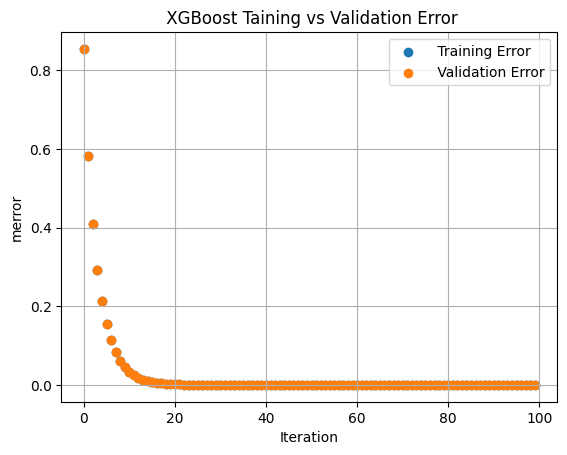

In [389]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(t_round, eval_result["validation_0"]["mlogloss"], label=" Training Error")
plt.scatter(t_round, eval_result["validation_1"]["mlogloss"], label=" Validation Error")
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("merror")
plt.title(" XGBoost Taining vs Validation Error")
plt.legend()
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

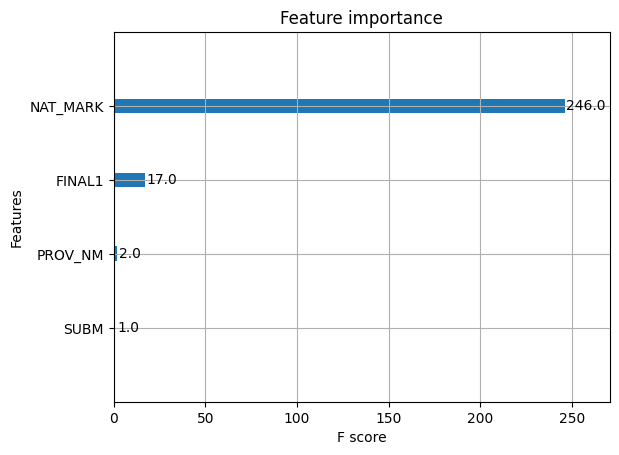

In [390]:
import xgboost as xgb
xgb.plot_importance(xg_classifier)

In [391]:
clf.score(X_test, y_test)

1.0

In [392]:
pd.crosstab(y_test, clf.predict(X_test))

col_0,0,1,2,3
NAT_MARK_range_encoded,,,,
0,2921,0,0,0
1,0,608,0,0
2,0,0,92,0
3,0,0,0,5


In [393]:
scores=cross_val_score( clf, X, y,cv=5,  scoring="recall_macro")

/home/codespace/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:50:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:50:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:50:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:50:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:50:58] WARNING: /workspace/src/learner.cc:740: 
Parameters

In [394]:
print(f'CV Accuracy   {np.mean(scores):.3f} +/-  {np.std(scores)}')

CV Accuracy   1.000 +/-  0.0


In [395]:
X_new=X.sample(5, random_state=42)
clf.fit(X, y )

/home/codespace/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:51:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['ACHIEVEMENTS1', 'MIDTERM1',
                                                   'FINAL1']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['PROV_NM'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytr...
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.5804285838459496),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=np.int64(5), max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=171, n_jobs=None, nthread=-1,
                               num_parallel_tree=None, ...))])

In [396]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(3626,), dtype=int32)

In [397]:
cl=["0-60","60-70" "70-80", "80-90","90-100"]
np.array([ cl[x] for x in y_pred])

array(['60-7070-80', '0-60', '0-60', ..., '0-60', '0-60', '0-60'],
      shape=(3626,), dtype='<U10')

In [398]:
from sklearn.metrics import confusion_matrix
cfm= pd.DataFrame(confusion_matrix(y_test, y_pred))
cfm.index.name="Actual"
cfm.columns.name="Predicted"

<Axes: xlabel='Predicted', ylabel='Actual'>

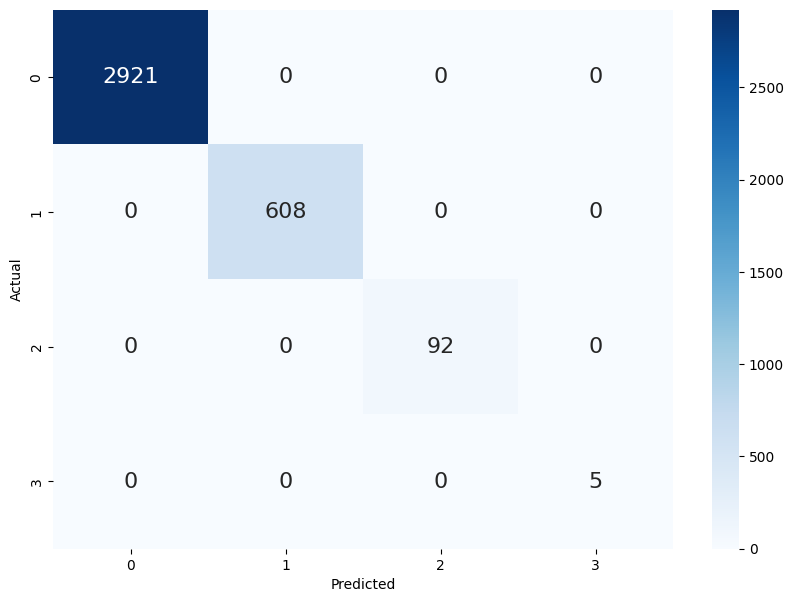

In [399]:
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib  inline
plt.figure(figsize=(10,7))
sns.heatmap(cfm , cmap="Blues", annot=True, annot_kws={"size":16}, fmt="g")

In [400]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores= learning_curve(pipe, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10),
                                                      cv=10, n_jobs=-1)

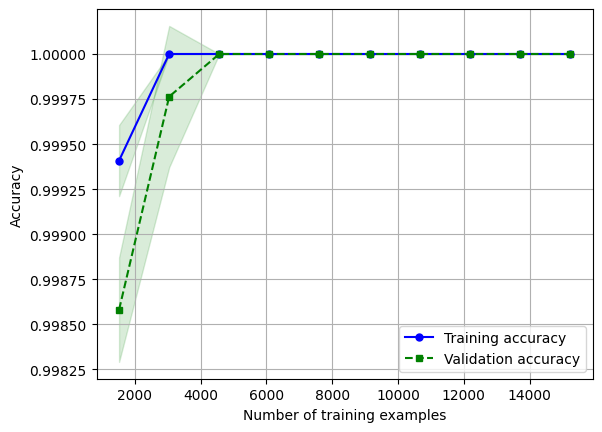

In [401]:
plt.plot(train_sizes, np.mean(train_scores, axis=1), color="blue", marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) +np.std(train_scores, axis=1),np.mean(train_scores, axis=1)-  np.std(train_scores,axis=1), alpha=0.15, color="green")


plt.plot(train_sizes, np.mean(test_scores, axis=1), color="green", marker="s", linestyle="--", markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) +np.std(test_scores, axis=1),np.mean(test_scores, axis=1)-  np.std(test_scores,axis=1), alpha=.15, color="green")

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel("Accuracy")
plt.legend(loc="best")
# plt.ylim([0.8, 1.03])
plt.show()

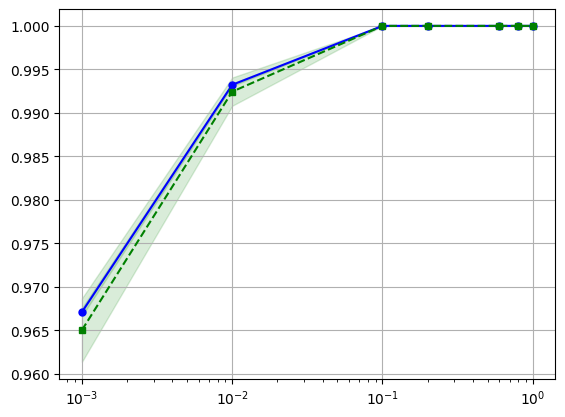

In [402]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
param_range=[0.001, 0.01, 0.1,0.2, 0.6, 0.8,  1]
train_scores, test_scores= validation_curve(pipe, X_train, y_train, param_name='xgbclassifier__learning_rate',
                                            param_range=param_range, cv=10)


plt.plot(param_range, np.mean(train_scores, axis=1), color="blue", marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, np.mean(train_scores, axis=1) +np.std(train_scores, axis=1),np.mean(train_scores, axis=1)-  np.std(train_scores,axis=1), alpha=0.15, color="green")


plt.plot(param_range, np.mean(test_scores, axis=1), color="green", marker="s", linestyle="--", markersize=5, label='Validation accuracy')
plt.fill_between(param_range, np.mean(test_scores, axis=1) +np.std(test_scores, axis=1),np.mean(test_scores, axis=1)-  np.std(test_scores,axis=1), alpha=.15, color="green")

plt.grid()
plt.xscale('log')
plt.ylimit=([0.8, 1])
plt.show()